# Exercise - Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex M=0,f=1 
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C 2= Cherbourg; Q 3= Queenstown; S 1= Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS(1%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn

titanic = pd.read_csv("titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()
df=titanic
titanic
# titanic.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 6. Convert categorical values (if any) to numbers in the dataset.

In [2]:
titanic= titanic.dropna(subset =['PassengerId','Survived','Pclass','Name','Sex','Age','Embarked'])
titanic
mapping={'S':0,'C':1,"Q":2}
titanic['embarked']=titanic['Embarked'].apply(lambda x:mapping[x])
titanic
mapping={'male':0,'female':1}
titanic['sex']=titanic['Sex'].apply(lambda x:mapping[x])
titanic.head()
# titanic

c:\users\yugesh keluskar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\yugesh keluskar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


# 1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 


In [3]:
titanic.drop(["Cabin","Ticket","SibSp","Fare","Parch","Embarked"],inplace=True,axis=1)
titanic.head()
# titanic

c:\users\yugesh keluskar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PassengerId,Survived,Pclass,Name,Sex,Age,embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


# 2. Plot a bar chart of the survived column. 


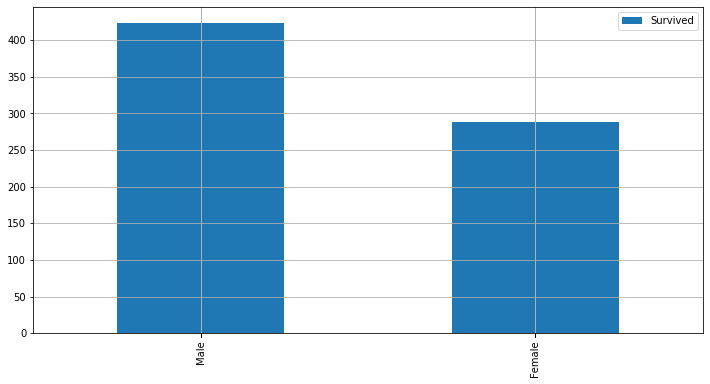

In [4]:
plt.figure(figsize=[12,6])
titanic['Survived'].value_counts().plot(kind='bar',label="Survived")
plt.xticks(titanic['Survived'],['Male','Female'])
plt.legend()
plt.grid(True)

# 3. Plot bar chart of the number of females who survived and not, and similarly males who survived and not. 

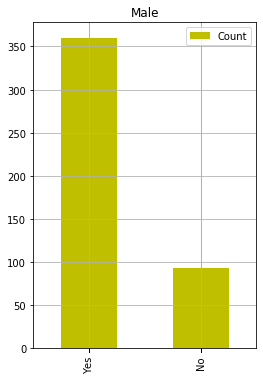

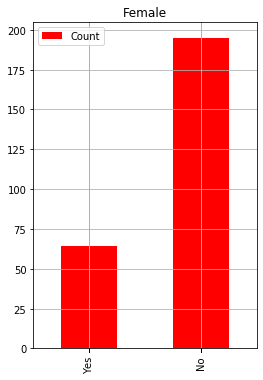

In [7]:
male = titanic[(titanic["Sex"] =='male')] 
female = titanic[(titanic["Sex"] =='female')]
import matplotlib.pyplot as plt
plt.figure(figsize=[4,6])
male['Survived'].value_counts().sort_index().plot(kind='bar',color='y',label='Count')
plt.xticks(titanic['Survived'],['Yes','No'])
plt.title('Male')
plt.legend()
plt.grid()

plt.figure(figsize=[4,6])
female['Survived'].value_counts().sort_index().plot(kind='bar',color='r',label='Count')
plt.xticks(titanic['Survived'],['Yes','No'])
plt.title('Female')
plt.legend()
plt.grid()

# 4. Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html


NameError: name 'p3' is not defined

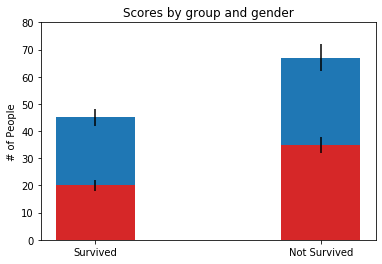

In [19]:
first_class = titanic[(titanic["Pclass"] =='1')] 
Second_class = titanic[(titanic["Pclass"] =='2')]
Third_class = titanic[(titanic["Pclass"] =='3')]

import numpy as np
import matplotlib.pyplot as plt

N = 2
menMeans = [20, 35]
womenMeans = (25, 32)
menStd = (2, 3)
womenStd = (3, 5)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd)

plt.ylabel('# of People')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Survived', 'Not Survived'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0],p3[0]), ('1st', '2nd',"3rd"))

# 5. Check if there are missing values in any columns. Remove such rows in the dataset.  


done

# 7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?


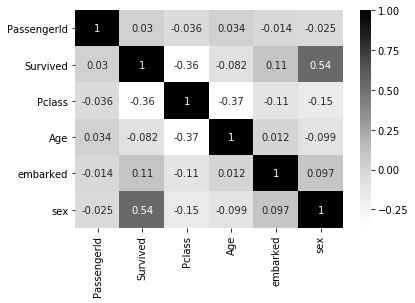

In [8]:
#df.corr()
import seaborn as sb
sb.heatmap(titani,c.corr(),annot = True , cmap ='Greys')

# 8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 


# Decision Tree Modelling
#### Use a decision tree classifier with a maximum depth of 6, to train your model. Obtain the decision tree & confusion matrix for the predictions. Obtain the score of the model.


# Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

# Which of the two models fairs better? 

# BONUS(1%)
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely? You will have to justify with some data analysis and visulization.